In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from lazy_GP import GP
%matplotlib inline

Create 2D regression problem

In [8]:
# Define a 2D nonlinear function
def nonlinear_function(x):
    return np.sin(x[:, 0]) * np.cos(x[:, 1])

# Generate input data
np.random.seed(42)
N = 200
X = np.random.uniform(-3, 3, (N, 2))
X_star = np.random.uniform(-3, 3, (100, 2))

# Generate noisy observations
sigma = 0.05
y = nonlinear_function(X) + sigma * np.random.randn(len(X))
y_star = nonlinear_function(X_star) + sigma * np.random.randn(len(X_star))

Fit model

In [10]:
m = GP()
theta = np.array([1., 1.])
m.train(X=X, y=y, theta=theta, sigma=sigma, learning_rate=1e-3, N_itt=5)

Iteration 0 theta =  [1.08023752 1.05293131] gradient evaluation took 16.933533191680908 seconds
Iteration 1 theta =  [1.17197327 1.12836771] gradient evaluation took 16.245189905166626 seconds
Iteration 2 theta =  [1.23473588 1.24337277] gradient evaluation took 15.80170750617981 seconds
Iteration 3 theta =  [1.30304023 1.34059414] gradient evaluation took 14.933626890182495 seconds
Iteration 4 theta =  [1.38832611 1.44281016] gradient evaluation took 15.007034540176392 seconds
Finished training


Make predictions

In [11]:
y_star_pred = m.predict(X_star)
mse = mean_squared_error(y_star, y_star_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.003274457777221691


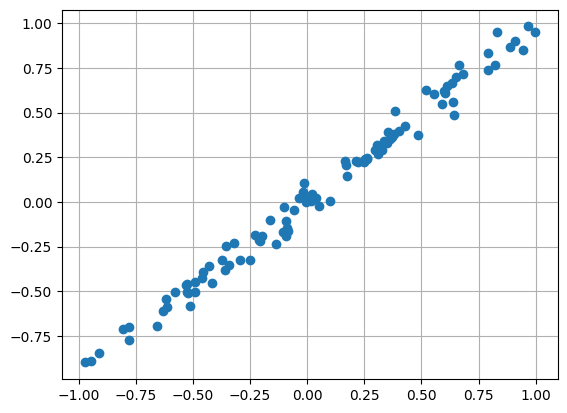

In [12]:
fig, ax = plt.subplots()
ax.plot(y_star, y_star_pred, 'o')
ax.grid()
plt.show()

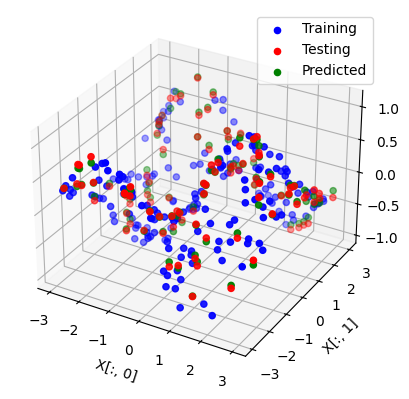

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Training')
ax.scatter(X_star[:, 0], X_star[:, 1], y_star, c='r', marker='o', label='Testing')
ax.scatter(X_star[:, 0], X_star[:, 1], y_star_pred, c='green', marker='o', label='Predicted')
ax.set_xlabel('X[:, 0]')
ax.set_ylabel('X[:, 1]')
ax.set_zlabel('y')
ax.legend()
plt.show()